# **Linear Regression**

################################################################################################################################



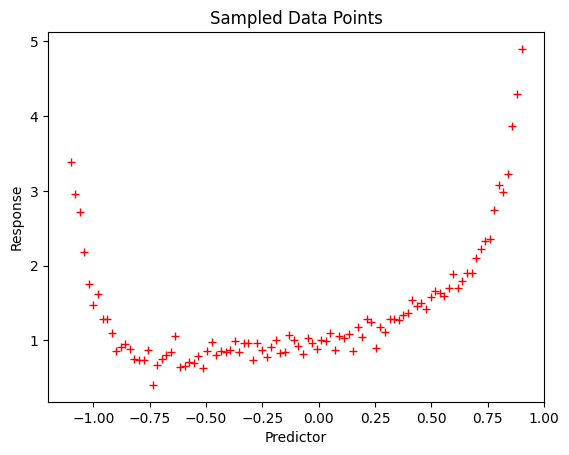


################################################################################################################################



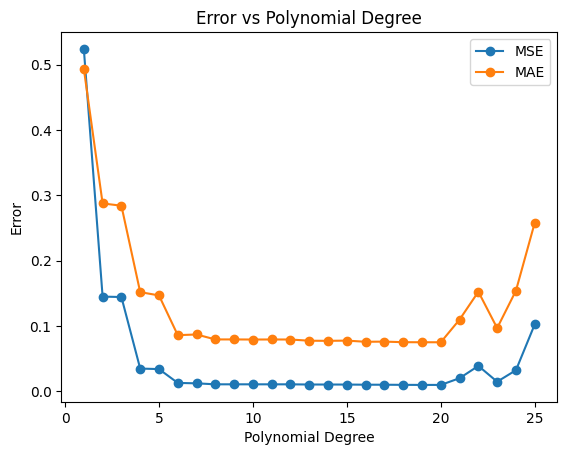


################################################################################################################################


################################################################################################################################
Optimal polynomial degree (MSE): 19, Min MSE: 0.009964121949980403
Optimal polynomial degree (MAE): 20, Min MAE: 0.07522968556127321
################################################################################################################################


################################################################################################################################



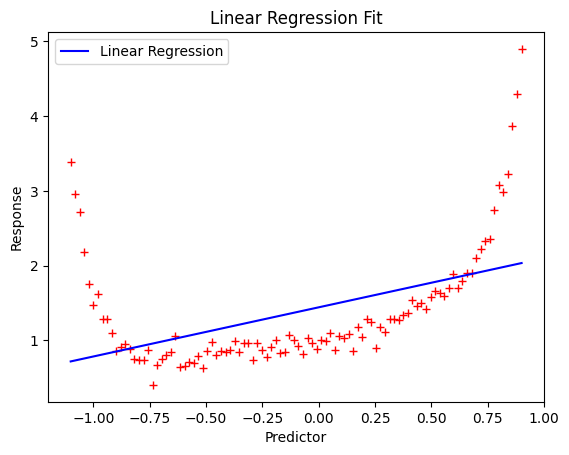


################################################################################################################################



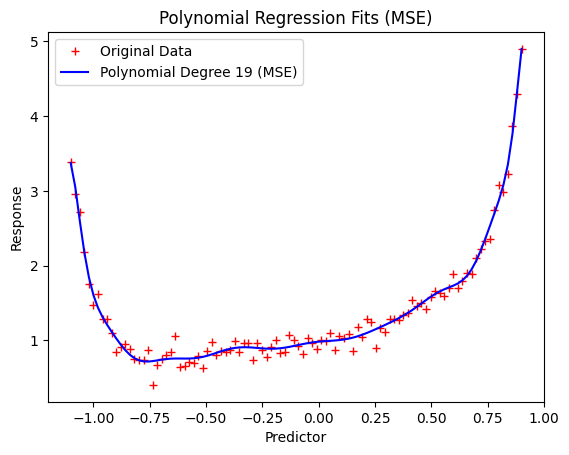


################################################################################################################################



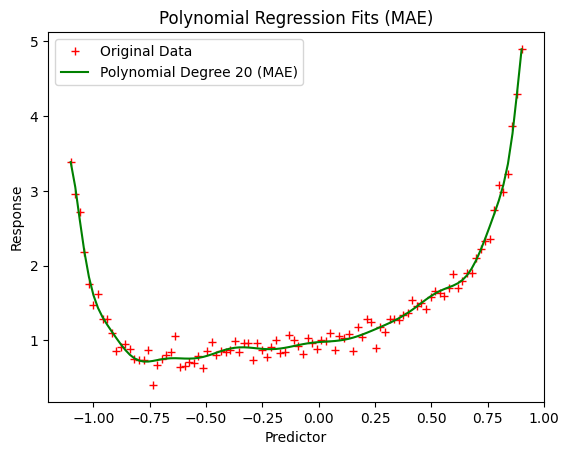


################################################################################################################################

################################################################################################################################
Error Metrics:!
################################################################################################################################


################################################################################################################################
MSE Errors:!
Simple Linear Regression (Line): 0.5240056827426208
Polynomial Degree 1: 0.5240056827426208
Polynomial Degree 2: 0.14506917256106414
Polynomial Degree 3: 0.14445630467639162
Polynomial Degree 4: 0.03499082967620017
Polynomial Degree 5: 0.03418869962180835
Polynomial Degree 6: 0.01303930862528018
Polynomial Degree 7: 0.01239068556341067
Polynomial Degree 8: 0.010894945570355585
Polynomial Degree 9: 0.010894819853037075
Polynomial Degree 10: 0.01088

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor, response = gen_data()
print("################################################################################################################################")
print("")
plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()
print("")
print("################################################################################################################################")
print("")


X = np.column_stack((np.ones_like(predictor), predictor))
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(response)
y_pred_line = X.dot(beta)


degrees = np.arange(1, 26)
mse_errors = []
mae_errors = []

for degree in degrees:
    X_poly = np.column_stack([predictor**i for i in range(degree + 1)])
    beta_poly = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(response)
    y_pred_poly = X_poly.dot(beta_poly)
    mse = np.mean((response - y_pred_poly)**2)
    mse_errors.append(mse)
    mae = np.mean(np.abs(response - y_pred_poly))
    mae_errors.append(mae)

# Plotting the error vs degree to visualize the optimal degree
plt.plot(degrees, mse_errors, marker='o', label='MSE')
plt.plot(degrees, mae_errors, marker='o', label='MAE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Error vs Polynomial Degree')
plt.legend()
plt.show()
print("")
print("################################################################################################################################")
print("")

optimal_degree_mse = degrees[np.argmin(mse_errors)]
min_mse = np.min(mse_errors)
optimal_degree_mae = degrees[np.argmin(mae_errors)]
min_mae = np.min(mae_errors)
print("")
print("################################################################################################################################")
print(f"Optimal polynomial degree (MSE): {optimal_degree_mse}, Min MSE: {min_mse}")
print(f"Optimal polynomial degree (MAE): {optimal_degree_mae}, Min MAE: {min_mae}")
print("################################################################################################################################")


print("")
print("")
print("################################################################################################################################")
print("")
# Fitting a line to data for linear regression
plt.plot(predictor, response, 'r+')
plt.plot(predictor, y_pred_line, label='Linear Regression', color='blue')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()
print("")
print("################################################################################################################################")
print("")

X_poly_mse = np.column_stack([predictor**i for i in range(optimal_degree_mse + 1)])
beta_poly_mse = np.linalg.inv(X_poly_mse.T.dot(X_poly_mse)).dot(X_poly_mse.T).dot(response)
y_pred_poly_mse = X_poly_mse.dot(beta_poly_mse)

X_poly_mae = np.column_stack([predictor**i for i in range(optimal_degree_mae + 1)])
beta_poly_mae = np.linalg.inv(X_poly_mae.T.dot(X_poly_mae)).dot(X_poly_mae.T).dot(response)
y_pred_poly_mae = X_poly_mae.dot(beta_poly_mae)

# Plotting polynomial fits for MSE
plt.plot(predictor, response, 'r+', label='Original Data')
plt.plot(predictor, y_pred_poly_mse, label=f'Polynomial Degree {optimal_degree_mse} (MSE)', color='blue')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Polynomial Regression Fits (MSE)')
plt.legend()
plt.show()
print("")
print("################################################################################################################################")
print("")

# Plotting polynomial fits for MAE
plt.plot(predictor, response, 'r+', label='Original Data')
plt.plot(predictor, y_pred_poly_mae, label=f'Polynomial Degree {optimal_degree_mae} (MAE)', color='green')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Polynomial Regression Fits (MAE)')
plt.legend()
plt.show()
print("")
print("################################################################################################################################")
print("")

# Report error metrics for all experiments in tabular form or any other suitable way for comparison
print("################################################################################################################################")
print("\033[1mError Metrics:!\033[0m")
print("################################################################################################################################")

print("\n")
print("################################################################################################################################")
print("\033[1mMSE Errors:!\033[0m")

print(f"Simple Linear Regression (Line): {np.mean((response - y_pred_line)**2)}")
for i, degree in enumerate(degrees):
    print(f"Polynomial Degree {degree}: {mse_errors[i]}")
print("################################################################################################################################")


print("\n")
print("################################################################################################################################")
print("\033[1mMAE Errors:!\033[0m")

print(f"Simple Linear Regression (Line): {np.mean(np.abs(response - y_pred_line))}")
for i, degree in enumerate(degrees):
    print(f"Polynomial Degree {degree}: {mae_errors[i]}")
print("################################################################################################################################")


# **Regularization**

################################################################################################################################
Generated Low Degree Polynomial:
Coefficients: [0.37748958 0.57268039 0.70411818]
################################################################################################################################



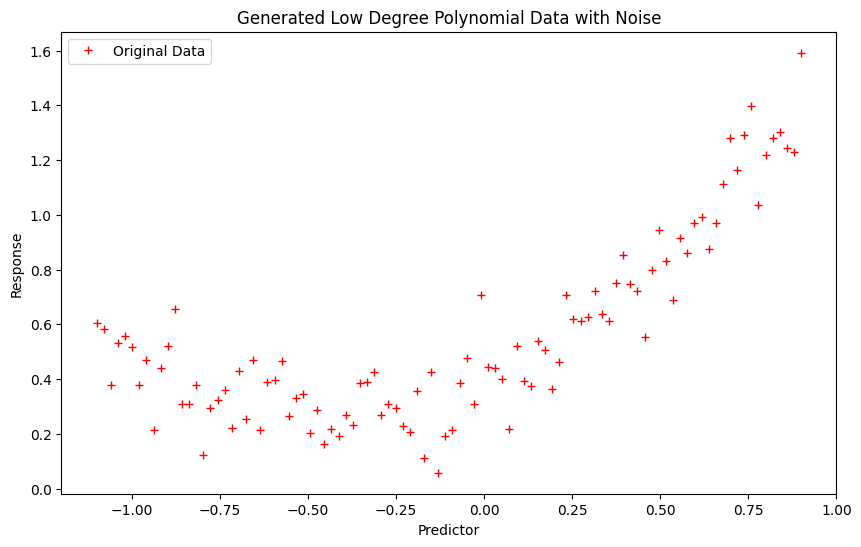


################################################################################################################################



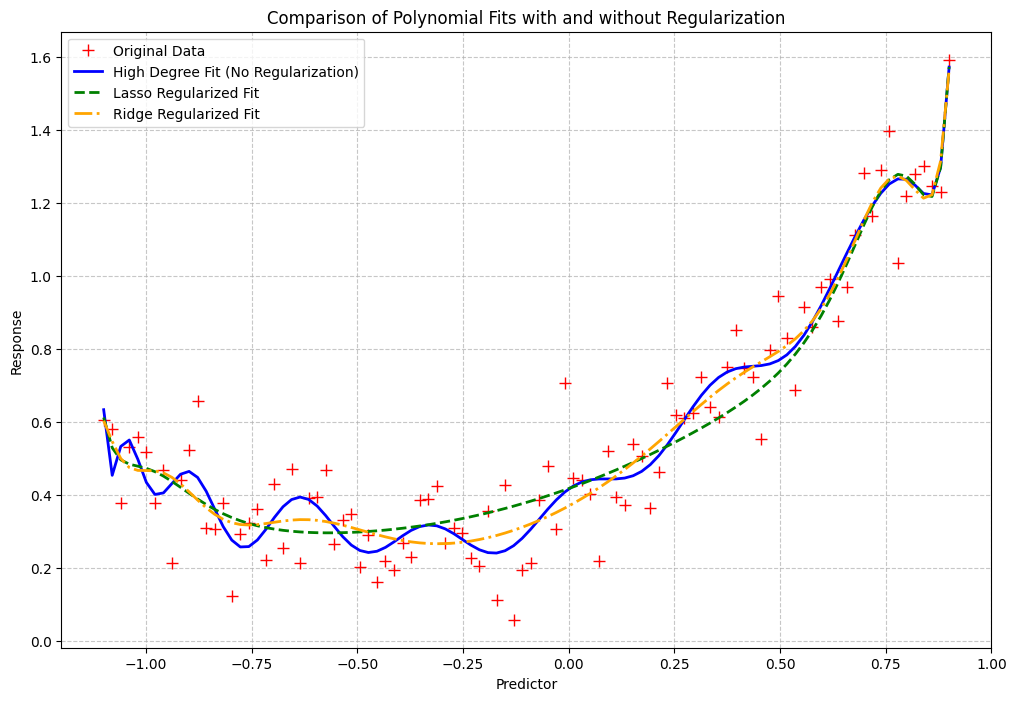


################################################################################################################################

################################################################################################################################
Mean Squared Error (No Regularization): 0.0097
Mean Squared Error (Lasso): 0.0126
Mean Squared Error (Ridge): 0.0110
################################################################################################################################


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

def gen_data_low():
    degree = np.random.choice([3, 5, 7])
    coeff = np.random.rand(degree)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1
    return x, y, coeff

x, y, original_coeff = gen_data_low()

print("################################################################################################################################")
print("Generated Low Degree Polynomial:")
print("Coefficients:", original_coeff)
print("################################################################################################################################")
print("")

# Visualizing the generated data
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r+', label='Original Data')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Generated Low Degree Polynomial Data with Noise')
plt.legend()
plt.show()
print("")
print("################################################################################################################################")
print("")

degree_no_reg = 20
model_no_reg = make_pipeline(StandardScaler(), PolynomialFeatures(degree_no_reg), Ridge(alpha=0))
model_no_reg.fit(x[:, np.newaxis], y)
y_pred_no_reg = model_no_reg.predict(x[:, np.newaxis])

# L1 Regularization (Lasso)
lasso_alpha = 0.01
model_lasso = make_pipeline(StandardScaler(), PolynomialFeatures(degree_no_reg), Lasso(alpha=lasso_alpha, max_iter=10000000))
model_lasso.fit(x[:, np.newaxis], y)
y_pred_lasso = model_lasso.predict(x[:, np.newaxis])

# L2 Regularization (Ridge)
ridge_alpha = 0.01
model_ridge = make_pipeline(StandardScaler(), PolynomialFeatures(degree_no_reg), Ridge(alpha=ridge_alpha))
model_ridge.fit(x[:, np.newaxis], y)
y_pred_ridge = model_ridge.predict(x[:, np.newaxis])

# Visualization of Polynomial Fits
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'r+', label='Original Data', markersize=8)
plt.plot(x, y_pred_no_reg, label='High Degree Fit (No Regularization)', linestyle='-', linewidth=2, color='blue')
plt.plot(x, y_pred_lasso, label='Lasso Regularized Fit', linestyle='--', linewidth=2, color='green')
plt.plot(x, y_pred_ridge, label='Ridge Regularized Fit', linestyle='-.', linewidth=2, color='orange')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Comparison of Polynomial Fits with and without Regularization')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
print("")
print("################################################################################################################################")
print("")

# Error Metrics Comparison
mse_no_reg = mean_squared_error(y, y_pred_no_reg)
mse_lasso = mean_squared_error(y, y_pred_lasso)
mse_ridge = mean_squared_error(y, y_pred_ridge)

print("################################################################################################################################")
print(f"Mean Squared Error (No Regularization): {mse_no_reg:.4f}")
print(f"Mean Squared Error (Lasso): {mse_lasso:.4f}")
print(f"Mean Squared Error (Ridge): {mse_ridge:.4f}")
print("################################################################################################################################")



# **Credit Data**

################################################################################################################################
Initial rows of data set
################################################################################################################################
    Income  Limit  Rating  Cards  Age  Education  Balance
0   14.891   3606     283      2   34         11      333
1  106.025   6645     483      3   82         15      903
2  104.593   7075     514      4   71         11      580
3  148.924   9504     681      3   36         11      964
4   55.882   4897     357      2   68         16      331
################################################################################################################################

################################################################################################################################
           Income         Limit      Rating       Cards         Age  \
count  400.000000    400.000000  400.00

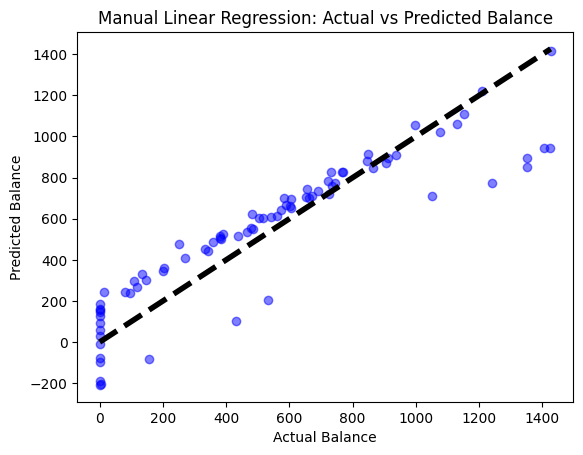


################################################################################################################################



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.938e+06, tolerance: 7.097e+03
  model = cd_fast.enet_coordinate_descent(


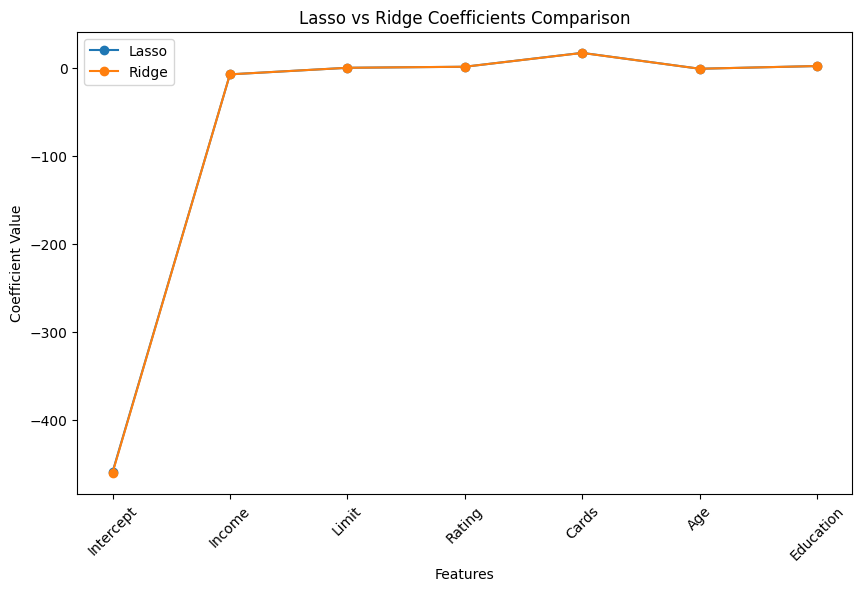


################################################################################################################################



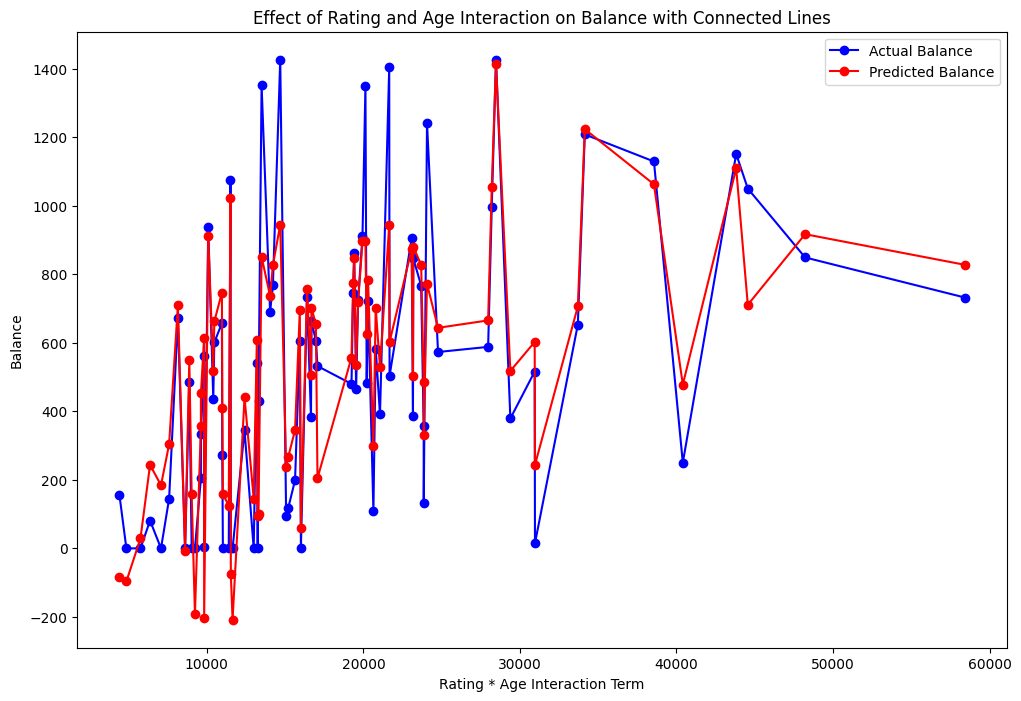


################################################################################################################################



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

credit = pd.read_csv('credit.csv')
print("################################################################################################################################")
print("Initial rows of data set")
print("################################################################################################################################")
print(credit.head())
print("################################################################################################################################")
print("")
print("################################################################################################################################")
print(credit.describe())
print("################################################################################################################################")
print("")
print("################################################################################################################################")
print("Is Null")
print("################################################################################################################################")
print(credit.isnull().sum())
print("################################################################################################################################")
print("")

X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']].values
y = credit['Balance'].values
X = np.insert(X, 0, 1, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

coefficients = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

y_pred = X_test.dot(coefficients)
print("################################################################################################################################")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))
print("################################################################################################################################")
print("")

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Balance')
plt.ylabel('Predicted Balance')
plt.title('Manual Linear Regression: Actual vs Predicted Balance')
plt.show()
print("")
print("################################################################################################################################")
print("")

lasso = Lasso(alpha=0.1)
lasso.fit(X_train[:, 1:], y_train)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train[:, 1:], y_train)

features = ['Intercept'] + list(credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']].columns)
lasso_coefs = [lasso.intercept_] + list(lasso.coef_)
ridge_coefs = [ridge.intercept_] + list(ridge.coef_)

plt.figure(figsize=(10, 6))
plt.plot(features, lasso_coefs, label='Lasso', marker='o')
plt.plot(features, ridge_coefs, label='Ridge', marker='o')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Lasso vs Ridge Coefficients Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()
print("")
print("################################################################################################################################")
print("")

credit['Rating_Age'] = credit['Rating'] * credit['Age']
X_interaction = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Rating_Age']].values
X_interaction = np.insert(X_interaction, 0, 1, axis=1)  # Add intercept term
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_interaction, y, test_size=0.2, random_state=42)
coefficients_int = np.linalg.inv(X_train_int.T.dot(X_train_int)).dot(X_train_int.T).dot(y_train_int)
y_pred_int = X_test_int.dot(coefficients_int)

interaction_data = pd.DataFrame({
    'Interaction_Term': X_test_int[:, -1],
    'Actual_Balance': y_test_int,
    'Predicted_Balance': y_pred_int
})

interaction_data_sorted = interaction_data.sort_values(by='Interaction_Term')

plt.figure(figsize=(12, 8))

plt.plot(interaction_data_sorted['Interaction_Term'], interaction_data_sorted['Actual_Balance'], label='Actual Balance', color='blue', marker='o', linestyle='-')
plt.plot(interaction_data_sorted['Interaction_Term'], interaction_data_sorted['Predicted_Balance'], label='Predicted Balance', color='red', marker='o', linestyle='-')

plt.xlabel('Rating * Age Interaction Term')
plt.ylabel('Balance')
plt.title('Effect of Rating and Age Interaction on Balance with Connected Lines')
plt.legend()
plt.show()
print("")
print("################################################################################################################################")
print("")



# **Shark Attack**

################################################################################################################################
Initial rows of data set
################################################################################################################################
   Year  Month  SharkAttacks  Temperature  IceCreamSales
0  2008      1            25         11.9             76
1  2008      2            28         15.2             79
2  2008      3            32         17.2             91
3  2008      4            35         18.5             95
4  2008      5            38         19.4            103
################################################################################################################################

################################################################################################################################
              Year      Month  SharkAttacks  Temperature  IceCreamSales
count    84.000000  84.000000     84.000000 

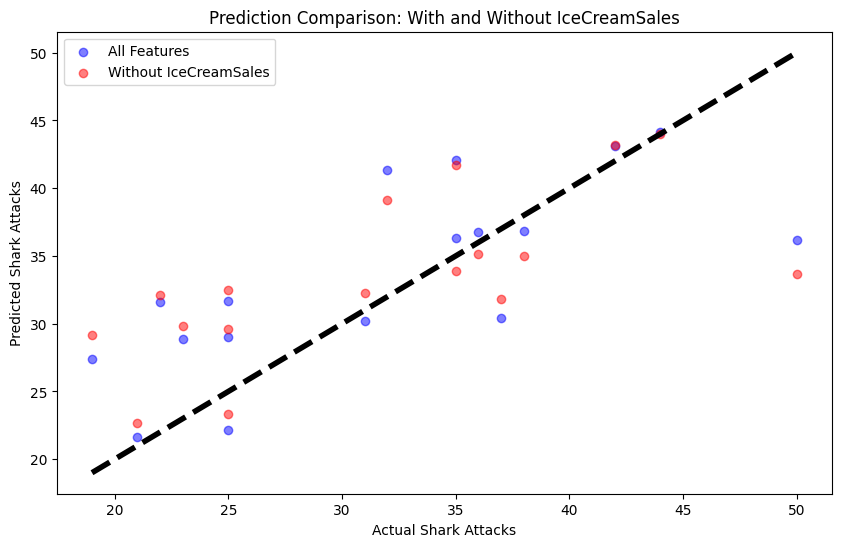


################################################################################################################################



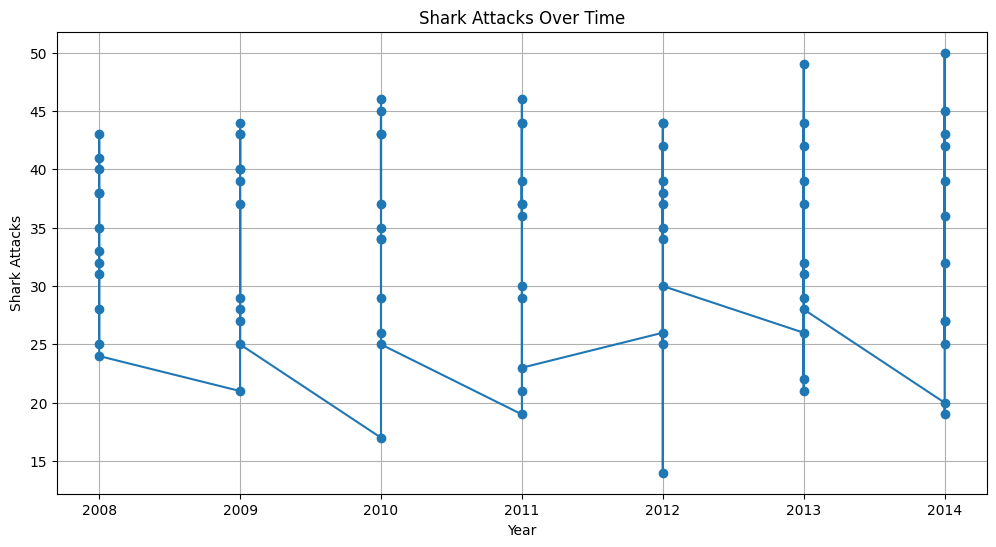


################################################################################################################################



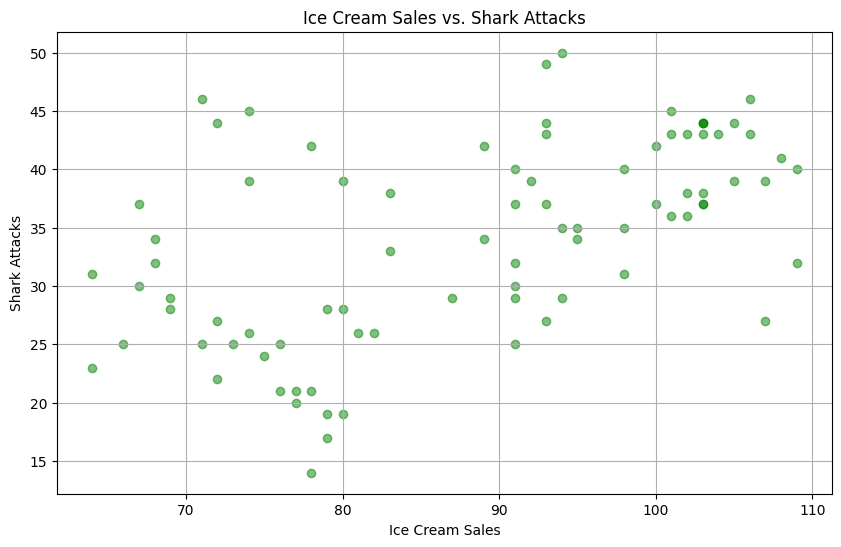


################################################################################################################################



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sharks = pd.read_csv('shark_attacks.csv')

print("################################################################################################################################")
print("Initial rows of data set")
print("################################################################################################################################")
print(sharks.head())
print("################################################################################################################################")
print("")
print("################################################################################################################################")
print(sharks.describe())
print("################################################################################################################################")
print("")
print("################################################################################################################################")
print("Is Null")
print("################################################################################################################################")
print(sharks.isnull().sum())
print("################################################################################################################################")
print("")


X = sharks[['Year', 'Month', 'Temperature', 'IceCreamSales']].values
y = sharks['SharkAttacks'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)

def compute_coefficients(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

coefficients_all = compute_coefficients(X_train, y_train)
y_pred_all = X_test.dot(coefficients_all)
mse_all = mean_squared_error(y_test, y_pred_all)

X_train_no_icecream = X_train[:, :4]  # Exclude IceCreamSales
X_test_no_icecream = X_test[:, :4]
coefficients_no_icecream = compute_coefficients(X_train_no_icecream, y_train)
y_pred_no_icecream = X_test_no_icecream.dot(coefficients_no_icecream)
mse_no_icecream = mean_squared_error(y_test, y_pred_no_icecream)


print("################################################################################################################################")
print("MSE with all features:", mse_all)
print("MSE without IceCreamSales:", mse_no_icecream)
print("################################################################################################################################")
print("")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_all, color='blue', label='All Features', alpha=0.5)
plt.scatter(y_test, y_pred_no_icecream, color='red', label='Without IceCreamSales', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Shark Attacks')
plt.ylabel('Predicted Shark Attacks')
plt.title('Prediction Comparison: With and Without IceCreamSales')
plt.legend()
plt.show()
print("")
print("################################################################################################################################")
print("")

# Additional Visualizations
# Shark Attacks Over Time
plt.figure(figsize=(12, 6))
plt.plot(sharks['Year'], sharks['SharkAttacks'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Shark Attacks')
plt.title('Shark Attacks Over Time')
plt.grid(True)
plt.show()
print("")
print("################################################################################################################################")
print("")

# Ice Cream Sales vs. Shark Attacks
plt.figure(figsize=(10, 6))
plt.scatter(sharks['IceCreamSales'], sharks['SharkAttacks'], color='green', alpha=0.5)
plt.xlabel('Ice Cream Sales')
plt.ylabel('Shark Attacks')
plt.title('Ice Cream Sales vs. Shark Attacks')
plt.grid(True)
plt.show()
print("")
print("################################################################################################################################")
print("")
